In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# Data import

In [2]:
chunk_size = 100000
sample_size_percent = 5

data = pd.DataFrame()

for chunk in pd.read_csv("./datas/en.openfoodfacts.org.products.csv", sep="\t", nrows=None, chunksize=chunk_size):
    actual_chunk_size = chunk.shape[0]
    random_size = int(actual_chunk_size * (sample_size_percent / 100))
    random_indexes = np.random.default_rng().choice(chunk.index, size=random_size, replace=False)
    chunk = chunk.loc[random_indexes]
    data = pd.concat([data, chunk])
    del chunk

data.shape

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,22,23,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self

(95978, 186)

## Dataset overview

In [3]:
rows_nb, cols_nb = data.shape

In [4]:
data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
62279,30034007744,http://world-en.openfoodfacts.org/product/0030...,usda-ndb-import,1489078403,2017-03-09T16:53:23Z,1587589828,2020-04-22T21:10:28Z,"Giant eagle, shredded mexican 4 cheese blend",NaN,NaN,NaN,NaN,NaN,NaN,"Giant Eagle, Giant Eagle Inc.","giant-eagle,giant-eagle-inc","Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Monterey jack cheese (pasteurized milk, cheese...",NaN,NaN,NaN,NaN,NaN,0.25 cup (28 g),28.0,NaN,2.0,NaN,"en:e160b,en:e235","E160b - Annatto,E235 - Natamycin",0.0,NaN,NaN,0.0,NaN,NaN,16.0,d,4.0,Milk and dairy products,Cheese,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To

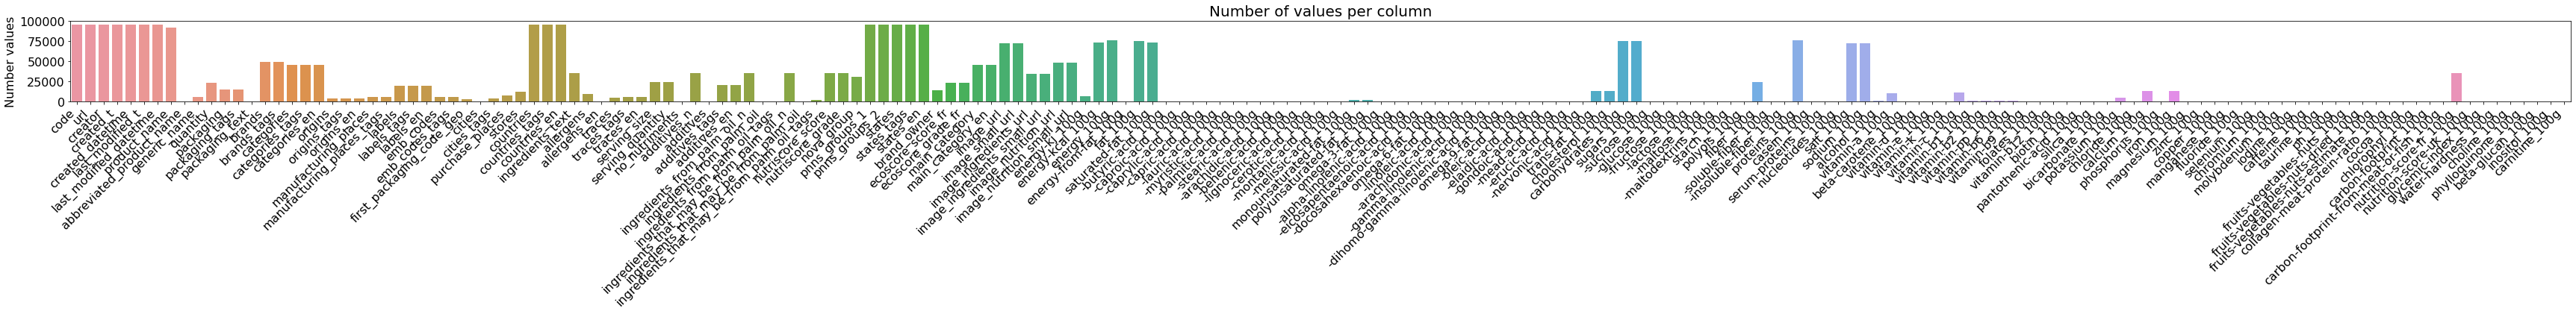

In [5]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# Feature analysis

In [6]:
features = []

## General informations

In [7]:
general_infos = data.loc[:, "code":"quantity"]

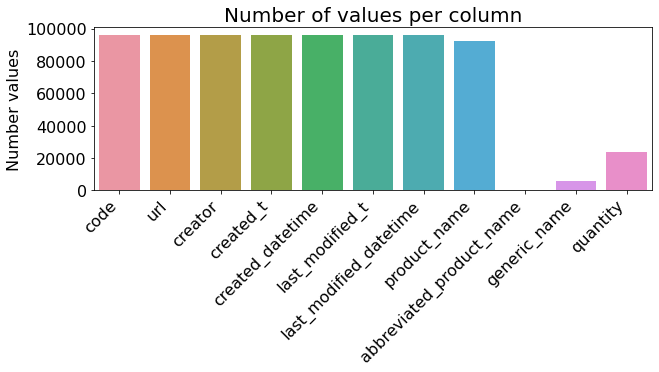

In [8]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [9]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
62279,30034007744,http://world-en.openfoodfacts.org/product/0030...,usda-ndb-import,1489078403,2017-03-09T16:53:23Z,1587589828,2020-04-22T21:10:28Z,"Giant eagle, shredded mexican 4 cheese blend",NaN,NaN,NaN
65501,30771080840,http://world-en.openfoodfacts.org/product/0030...,org-database-usda,1587662479,2020-04-23T17:21:19Z,1587662480,2020-04-23T17:21:20Z,Chicken sausage,NaN,NaN,NaN
4296,9542044008,http://world-en.openfoodfacts.org/product/0009...,openfoodfacts-contributors,1569396012,2019-09-25T07:20:12Z,1569396548,2019-09-25T07:29:08Z,Dark chocolate no sugar added,NaN,NaN,100
22518,13971001921,http://world-en.openfoodfacts.org/product/0013...,kiliweb,1600258070,2020-09-16T12:07:50Z,1600258070,2020-09-16T12:07:50Z,Natural apple chips,NaN,NaN,NaN
60610,294133,http://world-en.openfoodfacts.org/product/0029...,prepperapp,1586812584,2020-04-13T21:16:24Z,1586812584,2020-04-13T21:16:24Z,NaN,NaN,NaN,205g


In [10]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 62279 to 1901380
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   code                      95978 non-null  object
 1   url                       95978 non-null  object
 2   creator                   95978 non-null  object
 3   created_t                 95978 non-null  int64 
 4   created_datetime          95978 non-null  object
 5   last_modified_t           95978 non-null  int64 
 6   last_modified_datetime    95978 non-null  object
 7   product_name              91978 non-null  object
 8   abbreviated_product_name  344 non-null    object
 9   generic_name              5965 non-null   object
 10  quantity                  23903 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.8+ MB


### Redundancy: product_name, abbreviated_product_name, generic_name

In [11]:
general_infos[general_infos.generic_name.notna()].product_name.isna().sum()

15

We can see that 'abbreviated_product_name' contains too fews entries to be usefull.  
Regarding the 'generic_name', the fill percentage is not very high, but worst, each time 'generic_name' is filled, so is 'product_name'.

#### Conclusion
Only 'product_name' feature is usefull

In [14]:
features += [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "quantity"
]

## Tags

In [13]:
tags = data.loc[:, "packaging":"countries_en"]

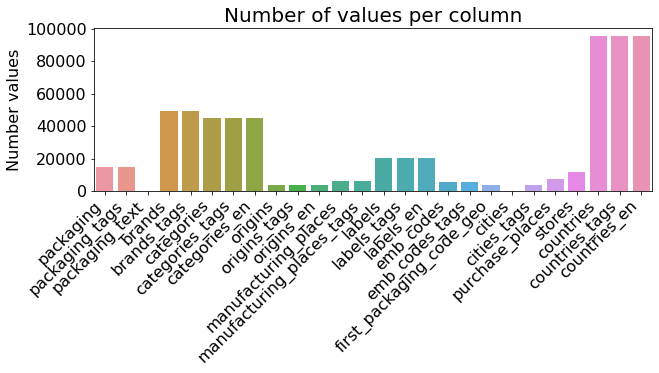

In [15]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [17]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
62279,NaN,NaN,NaN,"Giant Eagle, Giant Eagle Inc.","giant-eagle,giant-eagle-inc","Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
65501,NaN,NaN,NaN,NaN,NaN,"Meats, Prepared meats, Sausages","en:meats,en:prepared-meats,en:sausages","Meats,Prepared meats,Sausages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
4296,NaN,NaN,NaN,Lindt,lindt,"Snacks, Sweet snacks, Chocolates, Dark chocolates","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Cho...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:Kuwait,en:kuwait,Kuwait
22518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:us,en:united-states,United States
60610,NaN,NaN,NaN,M&S,m-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ireland, Germany","en:germany,en:ireland","Germany,Ireland"


In [19]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 62279 to 1901380
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  14892 non-null  object
 1   packaging_tags             14889 non-null  object
 2   packaging_text             281 non-null    object
 3   brands                     49587 non-null  object
 4   brands_tags                49582 non-null  object
 5   categories                 45372 non-null  object
 6   categories_tags            45372 non-null  object
 7   categories_en              45372 non-null  object
 8   origins                    4056 non-null   object
 9   origins_tags               4052 non-null   object
 10  origins_en                 4052 non-null   object
 11  manufacturing_places       6054 non-null   object
 12  manufacturing_places_tags  6052 non-null   object
dtypes: object(13)
memory usage: 10.3+ MB


In [20]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 62279 to 1901380
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    20233 non-null  object 
 1   labels_tags               20231 non-null  object 
 2   labels_en                 20231 non-null  object 
 3   emb_codes                 5836 non-null   object 
 4   emb_codes_tags            5836 non-null   object 
 5   first_packaging_code_geo  3543 non-null   object 
 6   cities                    0 non-null      float64
 7   cities_tags               3805 non-null   object 
 8   purchase_places           7727 non-null   object 
 9   stores                    12009 non-null  object 
 10  countries                 95669 non-null  object 
 11  countries_tags            95669 non-null  object 
 12  countries_en              95669 non-null  object 
dtypes: float64(1), object(12)
memory usage: 10.3+ MB


## Ingredients

## Misc datas

***
# to classify

## Feature list

In [ ]:
features = []

## Feature study

In [ ]:
data.nova_group.head()

3531     NaN
5708     4.0
91326    4.0
79335    4.0
22698    4.0
Name: nova_group, dtype: float64

In [ ]:
data.pnns_groups_1.head()

3531                  unknown
5708           Fat and sauces
91326           Sugary snacks
79335                 unknown
22698    Cereals and potatoes
Name: pnns_groups_1, dtype: object

In [ ]:
data.pnns_groups_2.head()

3531                  unknown
5708     Dressings and sauces
91326                  Sweets
79335                 unknown
22698                   Bread
Name: pnns_groups_2, dtype: object

In [ ]:
data.states.head()

3531     en:to-be-completed, en:nutrition-facts-to-be-c...
5708     en:to-be-completed, en:nutrition-facts-complet...
91326    en:to-be-completed, en:nutrition-facts-complet...
79335    en:to-be-completed, en:nutrition-facts-complet...
22698    en:to-be-completed, en:nutrition-facts-complet...
Name: states, dtype: object

In [ ]:
data.states_tags.head()

3531     en:to-be-completed,en:nutrition-facts-to-be-co...
5708     en:to-be-completed,en:nutrition-facts-complete...
91326    en:to-be-completed,en:nutrition-facts-complete...
79335    en:to-be-completed,en:nutrition-facts-complete...
22698    en:to-be-completed,en:nutrition-facts-complete...
Name: states_tags, dtype: object

In [ ]:
data.states_en.head()

3531     To be completed,Nutrition facts to be complete...
5708     To be completed,Nutrition facts completed,Ingr...
91326    To be completed,Nutrition facts completed,Ingr...
79335    To be completed,Nutrition facts completed,Ingr...
22698    To be completed,Nutrition facts completed,Ingr...
Name: states_en, dtype: object

In [ ]:
data.main_category.head()

3531                       NaN
5708                 en:sauces
91326       en:confectioneries
79335    en:baking-decorations
22698                en:breads
Name: main_category, dtype: object

In [ ]:
data.main_category_en.head()

3531                    NaN
5708                 Sauces
91326       Confectioneries
79335    Baking-decorations
22698                Breads
Name: main_category_en, dtype: object

In [ ]:
data.serving_size.head()

3531                NaN
5708      2 Tbsp (32 g)
91326     2 BARS (36 g)
79335     2 Tbsp (35 g)
22698    1.3 ONZ (36 g)
Name: serving_size, dtype: object

In [ ]:
data.serving_quantity.head()

3531      NaN
5708     32.0
91326    36.0
79335    35.0
22698    36.0
Name: serving_quantity, dtype: float64

In [ ]:
data.additives_n.head()

3531      NaN
5708      3.0
91326     1.0
79335    10.0
22698     3.0
Name: additives_n, dtype: float64

In [ ]:
data.additives_tags.head()

3531                                                   NaN
5708                               en:e211,en:e385,en:e415
91326                                     en:e322,en:e322i
79335    en:e102,en:e110,en:e171,en:e202,en:e306,en:e32...
22698                             en:e471,en:e472e,en:e481
Name: additives_tags, dtype: object

In [ ]:
data.additives_en.head()

3531                                                   NaN
5708     E211 - Sodium benzoate,E385 - Calcium disodium...
91326                    E322 - Lecithins,E322i - Lecithin
79335    E102 - Tartrazine,E110 - Sunset yellow FCF,E17...
22698    E471 - Mono- and diglycerides of fatty acids,E...
Name: additives_en, dtype: object

***
# Nutriscore

## Nutriscore feature analysis

In [ ]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [ ]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
3531,NaN,NaN,NaN
5708,13.0,d,13.0
91326,24.0,e,24.0
79335,23.0,e,23.0
22698,1.0,b,1.0
29443,NaN,NaN,NaN
37983,NaN,NaN,NaN
37696,20.0,e,20.0
35511,21.0,e,21.0
73710,6.0,d,6.0


In [ ]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

at least one value:  35103
nutriscore_grade recorded:  35103
all rows:  95978


We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [ ]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

14


['fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'sugars_100g',
 'sodium_100g']

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

5708                                                                                                                                                                                                                                                              Water, high fructose corn syrup, red wine vinegar, soybean oil, distilled vinegar, contains 2% less of: salt, red raspberry juice concentrate, xanthan gum, dried onion, fruit and vegetable juices (for color), natural flavor, poppy seeds, potassium sorbateand sodium benzoate (preservatives), spice, calcium disodium edta (to protect flavor).
91326                                                                                                                                                                                                                                                                                                                                                                                                  Milk choc

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

row[col]:  Water, high fructose corn syrup, red wine vinegar, soybean oil, distilled vinegar, contains 2% less of: salt, red raspberry juice concentrate, xanthan gum, dried onion, fruit and vegetable juices (for color), natural flavor, poppy seeds, potassium sorbateand sodium benzoate (preservatives), spice, calcium disodium edta (to protect flavor).
row[col]:  Water, high fructose corn syrup, red wine vinegar, soybean oil, distilled vinegar, contains 2% less of: salt, red raspberry juice concentrate, xanthan gum, dried onion, fruit and vegetable juices (for color), natural flavor, poppy seeds, potassium sorbateand sodium benzoate (preservatives), spice, calcium disodium edta (to protect flavor).
row[col]:  Milk chocolate (sugar, cocoa butter, chocolate, skim milk, lactose, milkfat, soy lecithin, artificial flavor), peanuts, corn syrup, sugar, palm oil, skim milk, less than 2% - lactose, salt, artificial flavor.
row[col]:  Sugar, vegetable shortening (contains one or more of the follow

5708     None
91326    None
79335    None
22698    None
37983    None
37696    None
35511    None
18445    None
87278    None
85195    None
dtype: object

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.

***
# Countries

In [ ]:
data.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
3531,France,en:france,France
5708,United States,en:united-states,United States
91326,United States,en:united-states,United States
79335,United States,en:united-states,United States
22698,United States,en:united-states,United States
29443,España,en:spain,Spain
37983,United States,en:united-states,United States
37696,United States,en:united-states,United States
35511,United States,en:united-states,United States
73710,en:gb,en:united-kingdom,United Kingdom


In [ ]:
fill_infos(data, "countries_en")

countries_en total rows:  95690
countries_en filled count:  95402
countries_en filled percentage:  3.3225694444444445


## Conclusion
The three features are completely filled and redundant. We can then keep only one of them, the 'countries_en' feature.

In [ ]:
features += "countries_en"

***
# Cleaning